In [183]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# The array x_t will contain all result of X(t) in range  0<= t <=1500
x_t = np.zeros(1506)
x_t[0]=1.5


# The function to calculate the result of x(t)
def Mackey_Glass(t_1):
  t = t_1 - 1
  if t-25<0:
     xt_25 = 0
  else:
     xt_25 = x_t[t-25]


  return ((x_t[t]) + ((0.2 * xt_25)/(1+ xt_25**10)) - (0.1 *x_t[t]))


# storing the result of X(t) in x_t
for i in range(1,1506):
  x_t[i] = Mackey_Glass(i)



inputs = np.zeros((1200, 5))   #shape is [1200,5]
outputs = np.zeros((1200, 1))  #shape is [1200,1]


#Generating the inputs and the outputs according to the lab instructions
#t satrts at 301 until it is 1500
t = 301
for i in range(1200):
  inputs[i][0] =  x_t[t-20]
  inputs[i][1] =  x_t[t-15]
  inputs[i][2] =  x_t[t-10]
  inputs[i][3] =  x_t[t-5]
  inputs[i][4] =  x_t[t]
  outputs[i][0] = x_t[t+5]
  t +=1

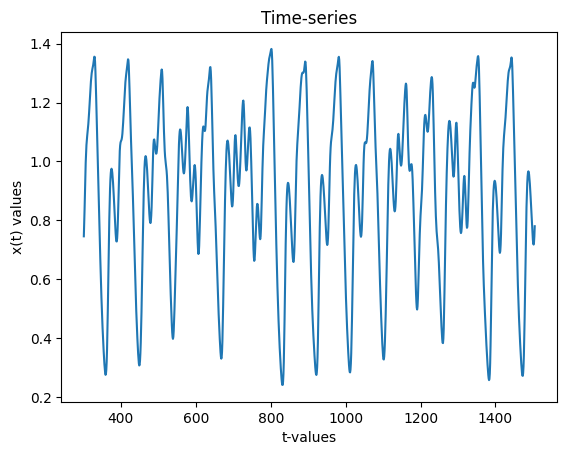

In [184]:
t = np.arange(start=301, stop=1506, dtype=int)
plt.plot(t, x_t[301:1506])
plt.xlabel("t-values")
plt.ylabel("x(t) values")
plt.title("Time-series")
plt.show()

In [185]:
# We divide the data into three subsets, trainning, validaion, and test
x = np.split(inputs, [800,1000])
y = np.split(outputs, [800,1000])

x_train = np.array(x[0])           #800 (shape [800,5])
x_validation = np.array(x[1])      #200
x_test = np.array(x[2])            #200

y_train = np.array(y[0]).flatten()
y_validation = np.array(y[1]).flatten()
y_test = np.array(y[2]).flatten()


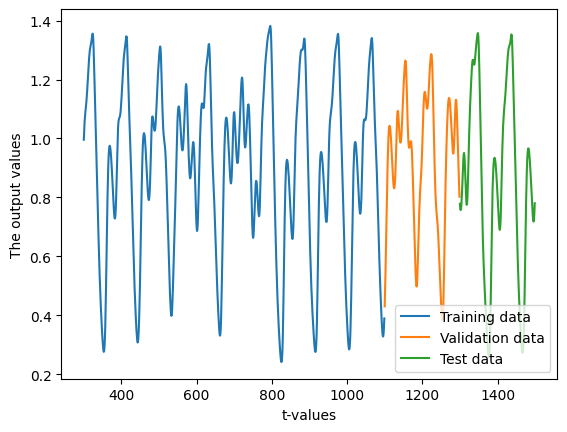

In [186]:
t = np.arange(start=300, stop=1500, dtype=int)
plt.plot(t[0:800], y_train , label="Training data")
plt.plot(t[800:1000], y_validation, label="Validation data")
plt.plot(t[1000:1200], y_test,  label="Test data")
plt.xlabel("t-values")
plt.ylabel("The output values")
plt.legend()
plt.show()

In [187]:
#Building the network using tensorflow

class neural_network:

   #n_layer is array that contain informatin about layers; number of nodes and the activation function in each layer
   def __init__(self, learning_rate, n_layer, epochs, loss, inputs, outputs,r_constant, stddev):
    self.learning_rate = learning_rate
    self.n_layer = n_layer
    self.model=tf.keras.Sequential()
    self.epochs = epochs
    self.loss = loss
    self.inputs= inputs
    self.outputs = outputs
    self.r_constant=r_constant
    self.stddev = stddev
    self.layers = []



   def createlayers(self):
      # Same input layer
     layer =  tf.keras.layers.GaussianNoise(stddev=self.stddev, seed = 2, input_shape=(5,))
     self.model.add(layer)
     self.layers.append(layer)


      #Here we add the hidden layers
     for layer in self.n_layer:
       layer =tf.keras.layers.Dense(layer[0] , activation=layer[1])
       self.model.add(layer)
       self.layers.append(layer)
      # same output layer

     layer =  tf.keras.layers.Dense(1 , activation="linear")
     self.layers.append(layer)
     self.model.add(layer)

   def train(self):

    SGD = tf.keras.optimizers.SGD(learning_rate=self.learning_rate, weight_decay=self.r_constant)       #
    self.model.compile(loss=self.loss, optimizer =SGD)
    temp =self.model.fit(self.inputs,
                   self.outputs,
                   epochs = self.epochs,
                   validation_data=(x_validation, y_validation),
                   shuffle=False)
    temp1=round(temp.history.get("val_loss")[-1],  4)
    temp2=round(temp.history.get("loss")[-1],  4)

    return temp1,temp2


   def predict(self, x_test):
    return self.model.predict(x_test)

   def evaluate(self,x_test, y_test):
       return self.model.evaluate(x_test, y_test)

   def get_weights(self):
    return self.layers[1].get_weights()[0]


In [ ]:
nh2 = [3, 6, 9**6]
stdev = 0.05
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses1_val = np.zeros(w_d_constants.shape)
losses1 = np.zeros(w_d_constants.shape)
weights1 = []
i = 0
for w_d_constant in w_d_constants:
 network = neural_network(n_layer=[[5, "sigmoid"],[nh2[0], "sigmoid"]],
                                      epochs=100,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.1,
                                      r_constant = w_d_constant,
                                      stddev= stdev
                                    )
 network.createlayers()
 loss_val, loss = network.train()
 losses1_val[i] = loss_val
 losses1[i] = loss
 weights1.append(network.get_weights())
 i += 1


weights2 = []
stdev = 0.15
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses2_val = np.zeros(w_d_constants.shape)
losses2 = np.zeros(w_d_constants.shape)
i = 0

for w_d_constant in w_d_constants:
  network = neural_network(n_layer=[[5, "sigmoid"],[nh2[0], "sigmoid"]],
                                       epochs=100,
                                       loss="mse",
                                       inputs=x_train,
                                       outputs=y_train,
                                       learning_rate=0.1,
                                       r_constant = w_d_constant,
                                       stddev= stdev
                                     )
  network.createlayers()
  loss_val, loss = network.train()
  losses2_val[i] = loss_val
  losses2[i] = loss
  weights2.append(network.get_weights())
  i += 1


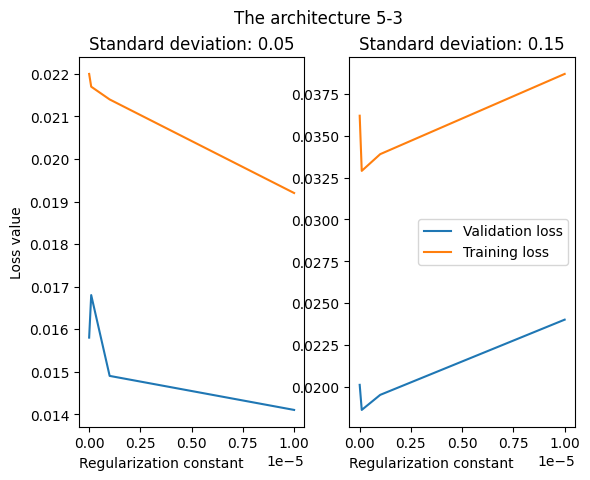

In [189]:
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
f, (ax1, ax2) = plt.subplots(1,2)
f.suptitle("The architecture 5-3")
ax1.plot(w_d_constants, losses1_val, label="Validation loss")
ax1.plot(w_d_constants,losses1, label="Training loss")
ax1.set_title("Standard deviation: 0.05")
ax1.set_xlabel("Regularization constant", loc = "left")
ax1.set_ylabel("Loss value")
ax2.plot(w_d_constants, losses2_val, label="Validation loss" )
ax2.plot(w_d_constants,losses2, label="Training loss")
ax2.set_title("Standard deviation: 0.05")
ax2.set_xlabel("Regularization constant", loc = "left")
ax2.set_title("Standard deviation: 0.15")
plt.legend()
plt.show()

In [ ]:
nh2 = [3, 6, 9**6]
stdev = 0.05
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses1_val = np.zeros(w_d_constants.shape)
losses1 = np.zeros(w_d_constants.shape)
weights1 = []
i = 0
for w_d_constant in w_d_constants:
 network = neural_network(n_layer=[[5, "sigmoid"],[nh2[1], "sigmoid"]],
                                      epochs=100,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.1,
                                      r_constant = w_d_constant,
                                      stddev= stdev
                                    )
 network.createlayers()
 loss_val, loss = network.train()
 losses1_val[i] = loss_val
 losses1[i] = loss
 weights1.append(network.get_weights())
 i += 1


weights2 = []
stdev = 0.15
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses2_val = np.zeros(w_d_constants.shape)
losses2 = np.zeros(w_d_constants.shape)
i = 0

for w_d_constant in w_d_constants:
  network = neural_network(n_layer=[[5, "sigmoid"],[nh2[1], "sigmoid"]],
                                       epochs=100,
                                       loss="mse",
                                       inputs=x_train,
                                       outputs=y_train,
                                       learning_rate=0.1,
                                       r_constant = w_d_constant,
                                       stddev= stdev
                                     )
  network.createlayers()
  loss_val, loss = network.train()
  losses2_val[i] = loss_val
  losses2[i] = loss
  weights2.append(network.get_weights())
  i += 1


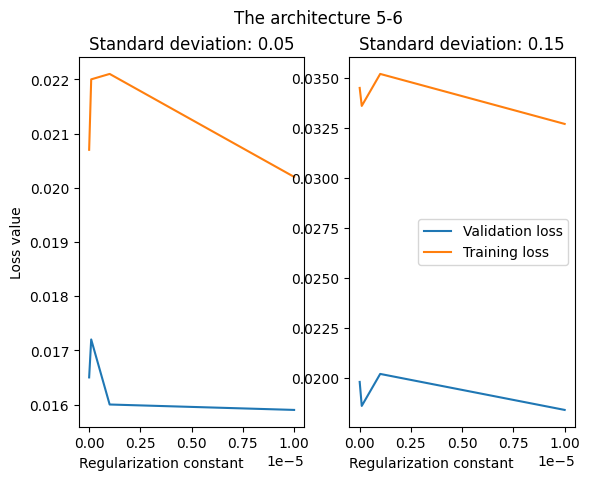

In [191]:
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
f, (ax1, ax2) = plt.subplots(1,2)
f.suptitle("The architecture 5-6")
ax1.plot(w_d_constants, losses1_val, label="Validation loss")
ax1.plot(w_d_constants,losses1, label="Training loss")
ax1.set_title("Standard deviation: 0.05")
ax1.set_xlabel("Regularization constant", loc = "left")
ax1.set_ylabel("Loss value")
ax2.plot(w_d_constants, losses2_val, label="Validation loss" )
ax2.plot(w_d_constants,losses2, label="Training loss")
ax2.set_title("Standard deviation: 0.05")
ax2.set_xlabel("Regularization constant", loc = "left")
ax2.set_title("Standard deviation: 0.15")
plt.legend()
plt.show()

In [ ]:
nh2 = [3, 6, 9**6]
stdev = 0.05
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses1_val = np.zeros(w_d_constants.shape)
losses1 = np.zeros(w_d_constants.shape)
weights1 = []
i = 0
for w_d_constant in w_d_constants:
 network = neural_network(n_layer=[[5, "sigmoid"],[nh2[2], "sigmoid"]],
                                      epochs=10,
                                      loss="mse",
                                      inputs=x_train,
                                      outputs=y_train,
                                      learning_rate=0.1,
                                      r_constant = w_d_constant,
                                      stddev= stdev
                                    )
 network.createlayers()
 loss_val, loss = network.train()
 losses1_val[i] = loss_val
 losses1[i] = loss
 weights1.append(network.get_weights())
 i += 1


weights2 = []
stdev = 0.15
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
losses2_val = np.zeros(w_d_constants.shape)
losses2 = np.zeros(w_d_constants.shape)
i = 0

for w_d_constant in w_d_constants:
  network = neural_network(n_layer=[[5, "sigmoid"],[nh2[2], "sigmoid"]],
                                       epochs=10,
                                       loss="mse",
                                       inputs=x_train,
                                       outputs=y_train,
                                       learning_rate=0.1,
                                       r_constant = w_d_constant,
                                       stddev= stdev
                                     )
  network.createlayers()
  loss_val, loss = network.train()
  losses2_val[i] = loss_val
  losses2[i] = loss
  weights2.append(network.get_weights())
  i += 1







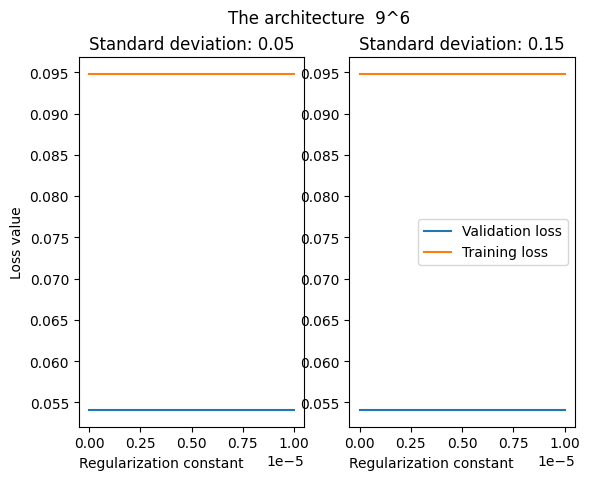

In [193]:
w_d_constants = np.array([0,0.0000001, 0.000001 ,0.00001])
f, (ax1, ax2) = plt.subplots(1,2)
f.suptitle("The architecture 5-9^6")
ax1.plot(w_d_constants, losses1_val, label="Validation loss")
ax1.plot(w_d_constants,losses1, label="Training loss")
ax1.set_title("Standard deviation: 0.05")
ax1.set_xlabel("Regularization constant", loc = "left")
ax1.set_ylabel("Loss value")
ax2.plot(w_d_constants, losses2_val, label="Validation loss" )
ax2.plot(w_d_constants,losses2, label="Training loss")
ax2.set_title("Standard deviation: 0.05")
ax2.set_xlabel("Regularization constant", loc = "left")
ax2.set_title("Standard deviation: 0.15")
plt.legend()
plt.show()